<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/wavelet2D_sparsity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
! pip install -q PyWavelets

# Sparsity estimation of Wavelet coefficients (2D)

In [34]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

# Dealing with discret image => discret Wavelet transform (like FFT) => discret Wavelet filters
print(pywt.wavelist(kind='discrete'))



['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [29]:
# Load image
original = pywt.data.camera()/255.  # transform pixel values in [0.,1.]


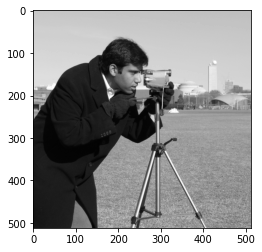

In [30]:
plt.imshow(original,cmap=plt.cm.gray)

A simple Wavelets filters set on 2D mix low pass filter ($\phi$) and high pass filters on both $(u_1,u_2)$ coordinates as:

\begin{equation}
\begin{cases}
\phi(u_1,u_2) & \phi(u_1) \phi(u_2)    & (LL) \\
\psi^1(u_1,u_2) &= \psi(u_1) \phi(u_2) & (HL)\\
\psi^2(u_1,u_2) &= \phi(u_1) \psi(u_2) & (LH)\\
\psi^3(u_1,u_2) &= \psi(u_1) \psi(u_2) & (HH)
\end{cases}
\end{equation}

In [ ]:
# 1 level Wavelet transform of the image
coeffs2 = pywt.dwt2(original, 'db1') # Daubechies 1 aka Haar discret wavelets
LL, (LH, HL, HH) = coeffs2

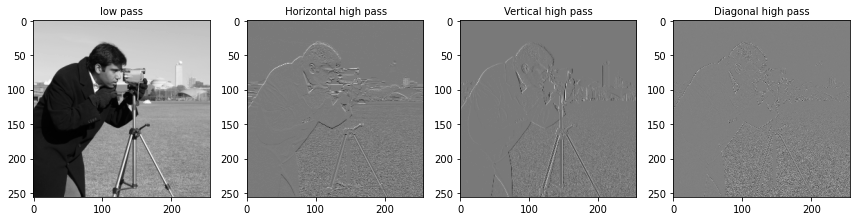

In [31]:
titles = ['low pass', ' Horizontal high pass',
          'Vertical high pass', 'Diagonal high pass']

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation=None, cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
#    ax.set_xticks([])
#    ax.set_yticks([])

fig.tight_layout()
plt.show()


# sparsity ratio for wavelet coeff maps. 

Reminder for 2D gaussian process : rg = pi/4 ~ 0.78. Lower r-values  means more sparsity.

In [32]:
#sparsity ratio
def r(x):
  return np.mean(np.abs(x))**2/np.mean(np.abs(x)**2)

In [33]:
[r(x) for x in (LH, HL, HH)]

[0.24245440494599513, 0.19167547928092585, 0.2557561355147359]